**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
library(fgsea)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [3]:
### init
ASSAYS = c("KS91_K562_ASTARRseq", "A001_K562_WSTARRseq", "Tewhey_K562_TileMPRA")
LABELS = c("ASTARR", "WSTARR", "TMPRA")
FOLDER = "coverage_astarrseq_peak_macs_input"

fnames = c(
    "result.Log2FC.raw.deseq.WGS.tsv",
    "result.Log2FC.raw.deseq.WGS.tsv",
    "result.Log2FC.raw.deseq.Merge.tsv"
)
names(fnames) = ASSAYS

### loop and import data
lst = lapply(ASSAYS, function(ASSAY){
    
    ### set file directories
    fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
    fname = fnames[ASSAY]
    fpath = file.path(fdiry, fname)

    ### read data
    dat = read_tsv(fpath, show_col_types = FALSE)
    return(dat)
})

names(lst) = LABELS
dat = bind_rows(lst, .id = "Assay")

### assign and show
dat_peak_deseq_starrmpra = dat
print(dim(dat))
print(table(dat$Assay))
head(dat)

[1] 495260      9

ASTARR  TMPRA WSTARR 
246850   1722 246688 


Assay,Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Dataset
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ASTARR,chr1_100006256_100006880,74.39238,-0.01311792,0.15512423,-0.08456397,9.326080e-01,0.9510236543,NA
ASTARR,chr1_100010437_100010915,48.25931,-0.80687947,0.22174651,-3.63874709,2.739677e-04,0.0008947519,NA
ASTARR,chr1_10002087_10003910,224.35927,-0.34892859,0.09743886,-3.58100041,3.422811e-04,0.0010926173,NA
ASTARR,chr1_100021298_100021629,38.13434,-1.03799571,0.25401013,-4.08643436,4.380534e-05,0.0001707736,NA
ASTARR,chr1_100023727_100023976,32.62049,-0.19100207,0.25625467,-0.74536036,4.560539e-01,0.5497617125,NA
ASTARR,chr1_100027983_100029702,290.98442,-0.18001582,0.09610434,-1.87312902,6.105057e-02,0.1032752224,NA


In [4]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_ranknorm_starrmpra = dat
print(dim(dat))
head(dat)

[1] 5166   10


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584


In [5]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.crispr.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_score_starrmpra_crispr = dat
print(dim(dat))
head(dat)

[1] 1722    4


Peak,RankNorm,CRISPR_pos,CRISPR_neg
<chr>,<dbl>,<dbl>,<dbl>
chrX_48996933_48997220,0.002129307,0.00000000,0.0000000
chr8_128298518_128298762,0.009291521,0.29710614,0.0000000
chr8_128242220_128242507,0.039876113,0.01841620,-0.3771868
chr11_34024311_34024546,0.040456833,0.00000000,0.0000000
chr8_128189792_128190210,0.041231127,0.09226309,-0.1074660
chr20_56703281_56703575,0.048199768,0.00000000,0.0000000


In [6]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chipseq_tf_subset.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chipseq_tf_subset = dat
print(dim(dat))
head(dat)

[1] 270491      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChIPseq_TF,YY1,1
chr10_100185017_100187275,ChIPseq_TF,YY1,1
chr10_100228452_100230090,ChIPseq_TF,YY1,1
chr10_100267066_100268374,ChIPseq_TF,YY1,1
chr10_100285974_100287341,ChIPseq_TF,YY1,2
chr10_100346328_100347693,ChIPseq_TF,YY1,1


## Prepare score and annotation set for enrichment analysis

In [7]:
dat = dat_peak_annot_chipseq_tf_subset
lst = split(dat$Peak, dat$Label)
lst_annot = lst

print(length(lst))
print(names(lst))
cat("\n\n")

for (idx in names(lst_annot)){
    x = lst_annot[[idx]]
    cat(idx, length(x), "\n")
    print(head(x))
    cat("\n\n")
}

[1] 16
 [1] "ATF1"   "CTCF"   "ELK1"   "EP300"  "GATA1"  "JUN"    "KLF10"  "KLF16" 
 [9] "NFE2"   "NRF1"   "POLR2A" "REST"   "SP1"    "TAL1"   "YY1"    "ZEB2"  


ATF1 24776 
[1] "chr10_100009096_100010466" "chr10_100185017_100187275"
[3] "chr10_100228452_100230090" "chr10_100267066_100268374"
[5] "chr10_100285974_100287341" "chr10_100346328_100347693"


CTCF 37780 
[1] "chr10_100009096_100010466" "chr10_100045961_100046653"
[3] "chr10_100228452_100230090" "chr10_100240591_100241246"
[5] "chr10_100285974_100287341" "chr10_100338359_100339077"


ELK1 3149 
[1] "chr10_100228452_100230090" "chr10_100535377_100536237"
[3] "chr10_100986723_100987807" "chr10_101782256_101784101"
[5] "chr10_102132343_102134065" "chr10_103395147_103397089"


EP300 22333 
[1] "chr10_100185017_100187275" "chr10_100358645_100359733"
[3] "chr10_100370571_100371646" "chr10_100373060_100374238"
[5] "chr10_100535377_100536237" "chr10_100630761_100631892"


GATA1 11815 
[1] "chr10_100289686_100290090" "chr10_100358645

In [64]:
dat = dat_peak_score_starrmpra_crispr
vec = dat %>%
    dplyr::select(Peak, RankNorm) %>%
    tibble::deframe()

vec_score = vec
print(length(vec))
print(head(vec))

[1] 1722
  chrX_48996933_48997220 chr8_128298518_128298762 chr8_128242220_128242507 
             0.002129307              0.009291521              0.039876113 
 chr11_34024311_34024546 chr8_128189792_128190210  chr20_56703281_56703575 
             0.040456833              0.041231127              0.048199768 


In [65]:
set.seed(123)
fgseaRes = fgsea(
    pathways  = lst_annot, 
    stats     = vec_score,
    eps       = 0.0,
    scoreType = "pos"
    #minSize   = 15,
    #maxSize   = 500
)

print(class(fgseaRes))

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (13.94% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


[1] "data.table" "data.frame"


In [66]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(nlogP) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))
    
dat_fgsea_merge_overall = dat
print(dim(dat))
dat

[1] 16  8


pathway,pval,padj,log2err,ES,NES,size,nlogP
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
KLF10,8.593886e-03,8.593886e-03,0.3807304,0.6597818,1.985779,7,2.06581
GATA1,1.435912e-11,1.531640e-11,0.8753251,0.5081333,2.383818,91,10.81484
CTCF,9.185462e-12,1.049767e-11,0.8753251,0.3905116,1.979741,271,10.97891
NFE2,5.764962e-12,7.095337e-12,0.8870750,0.5014436,2.383751,102,11.14903
ELK1,3.793546e-12,5.058062e-12,0.8870750,0.7584162,2.957699,25,11.29602
TAL1,2.997079e-17,4.359388e-17,1.0672100,0.4888229,2.429244,180,16.36057
KLF16,4.156036e-18,6.649658e-18,1.0959293,0.5360293,2.589325,126,17.17720
SP1,3.815552e-21,6.783204e-21,1.1866510,0.6277946,2.921299,88,20.16857
ZEB2,2.602889e-22,5.205778e-22,1.2210538,0.5651548,2.758134,139,21.28351


In [69]:
dat = dat_fgsea_merge_overall
cat(as.character(dat$pathway))

KLF10 GATA1 CTCF NFE2 ELK1 TAL1 KLF16 SP1 ZEB2 EP300 REST POLR2A JUN NRF1 YY1 ATF1

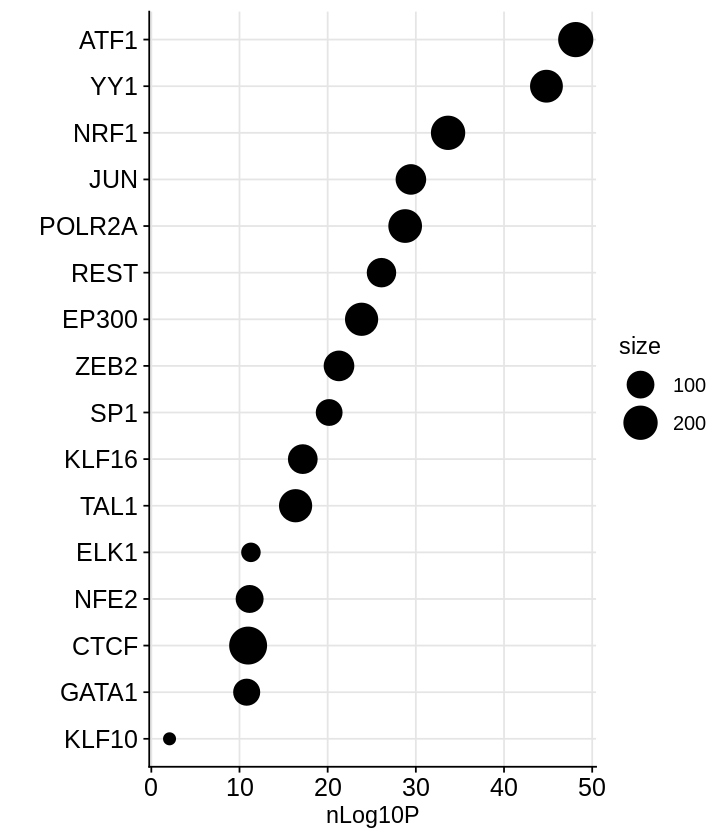

In [11]:
theme_text = theme(
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15)
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

dat = dat_fgsea_merge_overall
gpt = ggplot(dat, aes(x = nlogP, y=pathway, size=size)) + 
    geom_point() + 
    scale_size(range = c(3, 10)) +
    labs(x = "nLog10P", y = "") +
    theme_cowplot() +
    theme_grid  +
    theme_text

options(repr.plot.height=7, repr.plot.width=6)
print(gpt)

In [12]:
dat = dat_peak_ranknorm_starrmpra
vec = dat %>%
    dplyr::select(Peak, Log2FC) %>%
    tibble::deframe()
lst = split(vec, dat$Assay)

lst_score = lst
print(names(lst))
for (x in lst){print(length(x))}

[1] "ASTARR" "TMPRA"  "WSTARR"
[1] 1722
[1] 1722
[1] 1722


In [13]:
lst = lapply(lst_score, function(vec_score){
    set.seed(123)
    res = fgsea(
        pathways  = lst_annot, 
        stats     = vec_score,
        eps       = 0.0,
        scoreType = "pos"
        #minSize   = 15,
        #maxSize   = 500
    )
})

dat = bind_rows(lst, .id = "Assay")
dat = dat %>% 
    dplyr::select(Assay, pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj))
    
dat_fgsea_merge_assay = dat
print(dim(dat))
head(dat)

[1] 48  9


Assay,pathway,pval,padj,log2err,ES,NES,size,nlogP
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
ASTARR,ATF1,3.278332e-23,1.748444e-22,1.2462328,0.5911294,3.018372,216,21.75735
ASTARR,CTCF,2.697303e-02,2.697303e-02,0.2765006,0.2715019,1.394351,271,1.56907
ASTARR,ELK1,7.952867e-05,9.788144e-05,0.5384341,0.6610732,2.896497,25,4.00930
ASTARR,EP300,1.209044e-32,1.934470e-31,1.4885397,0.6883717,3.506324,180,30.71344
ASTARR,GATA1,6.148049e-20,1.229610e-19,1.1512205,0.7178292,3.559978,91,18.91023
ASTARR,JUN,3.159799e-25,2.527839e-24,1.3030932,0.6884064,3.464199,138,23.59725


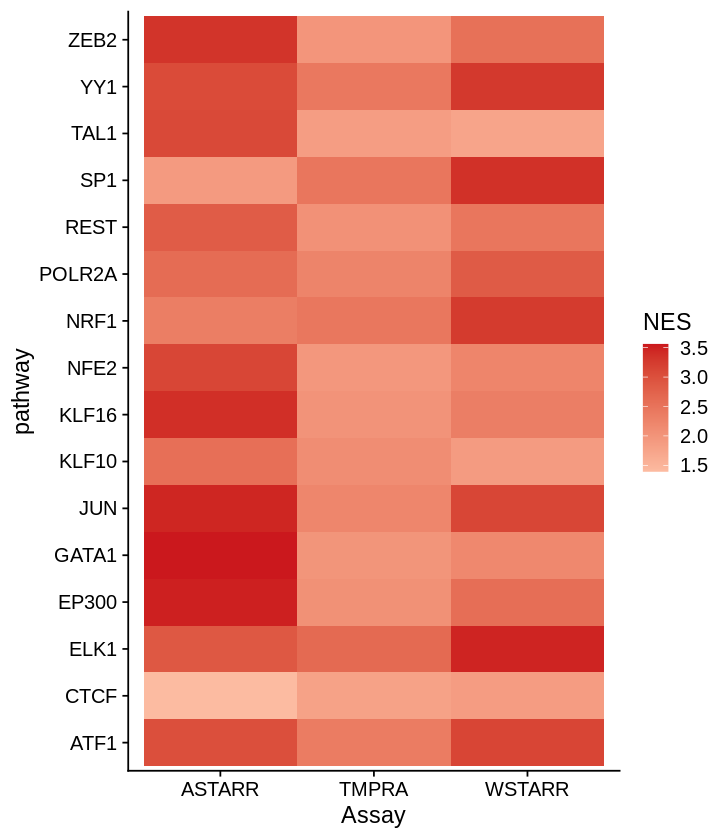

In [14]:
theme_fill = scale_fill_gradient(low = "#fcbba1", high = "#cb181d")

dat = dat_fgsea_merge_assay
gpt = ggplot(dat, aes(x=Assay, y=pathway, fill=NES)) + 
    geom_tile() + 
    theme_cowplot() +
    theme_fill
print(gpt)

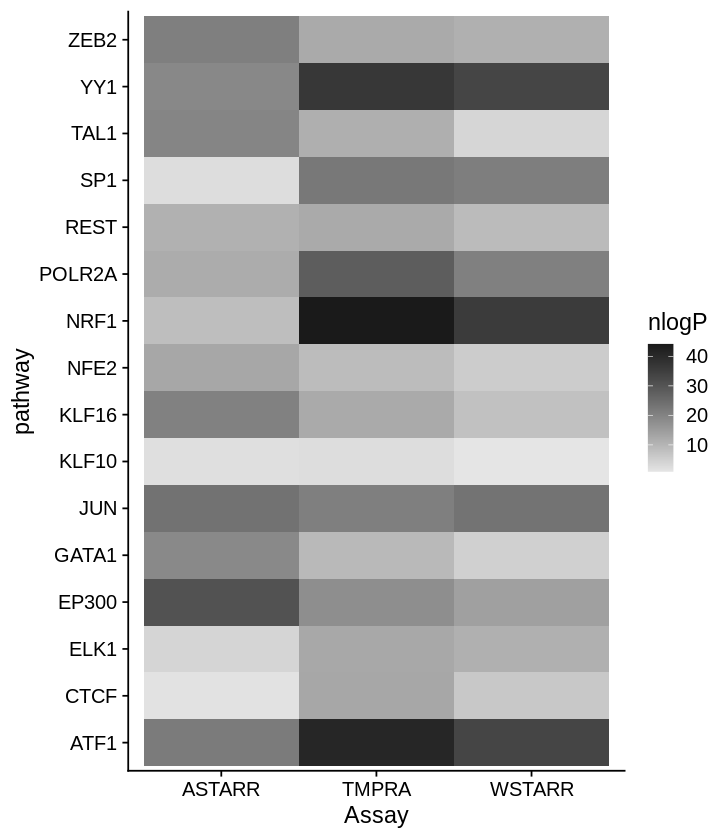

In [15]:
theme_fill = scale_fill_gradient(low = "grey90", high = "grey10")

dat = dat_fgsea_merge_assay
gpt = ggplot(dat, aes(x=Assay, y=pathway, fill=nlogP)) + 
    geom_tile() + 
    theme_cowplot() +
    theme_fill
print(gpt)

In [17]:
dat = dat = dat_peak_deseq_starrmpra
vec = dat %>%
    dplyr::select(Peak, log2FoldChange) %>%
    tibble::deframe()
lst = split(vec, dat$Assay)

lst_score = lst

for (idx in names(lst)){
    vec = lst[[idx]]    
    cat(idx, length(vec), "\n")
    print(head(vec))
    cat("\n")
}

ASTARR 246850 
chr1_100006256_100006880 chr1_100010437_100010915   chr1_10002087_10003910 
             -0.01311792              -0.80687947              -0.34892859 
chr1_100021298_100021629 chr1_100023727_100023976 chr1_100027983_100029702 
             -1.03799571              -0.19100207              -0.18001582 

TMPRA 1722 
chr11_61792068_61793464 chr11_61800085_61801113 chr11_61806630_61807154 
              1.6665654               1.8554038              -1.3562271 
chr11_61814735_61817343 chr11_61822094_61822443 chr11_61825795_61826306 
              2.5310145              -1.7731459              -0.3921375 

WSTARR 246688 
chr1_100006256_100006880 chr1_100010437_100010915   chr1_10002087_10003910 
             -0.48849764              -0.30895395              -0.38624192 
chr1_100021298_100021629 chr1_100023727_100023976 chr1_100027983_100029702 
             -0.59404974               0.04988694              -0.22927538 



In [19]:
for (idx1 in names(lst_annot)){
    vec_annot = lst_annot[[idx1]]
    cat(idx1, "\n")
    
    for (idx2 in names(lst_score)){
        vec_score = names(lst_score[[idx2]])
        
        vec = intersect(vec_score, vec_annot)
        
        cat(idx2, length(vec), "/", length(vec_annot), "\n")    
        
        flush.console()
    }
    
    cat("\n")
}

ATF1 
ASTARR 24776 / 24776 
TMPRA 216 / 24776 
WSTARR 24773 / 24776 

CTCF 
ASTARR 37780 / 37780 
TMPRA 271 / 37780 
WSTARR 37776 / 37780 

ELK1 
ASTARR 3149 / 3149 
TMPRA 25 / 3149 
WSTARR 3149 / 3149 

EP300 
ASTARR 22333 / 22333 
TMPRA 180 / 22333 
WSTARR 22332 / 22333 

GATA1 
ASTARR 11815 / 11815 
TMPRA 91 / 11815 
WSTARR 11815 / 11815 

JUN 
ASTARR 16287 / 16287 
TMPRA 138 / 16287 
WSTARR 16286 / 16287 

KLF10 
ASTARR 650 / 650 
TMPRA 7 / 650 
WSTARR 650 / 650 

KLF16 
ASTARR 15344 / 15344 
TMPRA 126 / 15344 
WSTARR 15342 / 15344 

NFE2 
ASTARR 14986 / 14986 
TMPRA 102 / 14986 
WSTARR 14984 / 14986 

NRF1 
ASTARR 22194 / 22194 
TMPRA 200 / 22194 
WSTARR 22193 / 22194 

POLR2A 
ASTARR 17945 / 17945 
TMPRA 189 / 17945 
WSTARR 17941 / 17945 

REST 
ASTARR 14306 / 14306 
TMPRA 122 / 14306 
WSTARR 14305 / 14306 

SP1 
ASTARR 9048 / 9048 
TMPRA 88 / 9048 
WSTARR 9048 / 9048 

TAL1 
ASTARR 22430 / 22430 
TMPRA 180 / 22430 
WSTARR 22428 / 22430 

YY1 
ASTARR 20494 / 20494 
TMPRA 174 / 20

In [51]:
vec_score = lst_score[["ASTARR"]]
print(length(vec_score))
head(vec_score)

[1] 246850


chr1_100006256_100006880 chr1_100010437_100010915   chr1_10002087_10003910 
             -0.01311792              -0.80687947              -0.34892859 
chr1_100021298_100021629 chr1_100023727_100023976 chr1_100027983_100029702 
             -1.03799571              -0.19100207              -0.18001582

In [52]:
set.seed(123)
system.time(res_astarr <- fgsea(
    pathways  = lst_annot, 
    stats     = vec_score
))

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-50. You can set the `eps` argument to zero for better estimation.”


    user   system  elapsed 
4827.925   10.292 1099.361 

In [53]:
dat = res_astarr
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(NES) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))

dat_astarr = dat
dat

pathway,pval,padj,log2err,ES,NES,size,nlogP
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CTCF,1e-50,1e-50,NA,0.2662526,1.284943,37780,50
SP1,1e-50,1e-50,NA,0.4052435,1.948436,9048,50
NRF1,1e-50,1e-50,NA,0.4574510,2.204118,22194,50
POLR2A,1e-50,1e-50,NA,0.4943616,2.380848,17945,50
REST,1e-50,1e-50,NA,0.5260944,2.534823,14306,50
YY1,1e-50,1e-50,NA,0.5434324,2.618104,20494,50
KLF16,1e-50,1e-50,NA,0.5515343,2.656555,15344,50
ATF1,1e-50,1e-50,NA,0.5637904,2.717398,24776,50
TAL1,1e-50,1e-50,NA,0.5695590,2.744100,22430,50


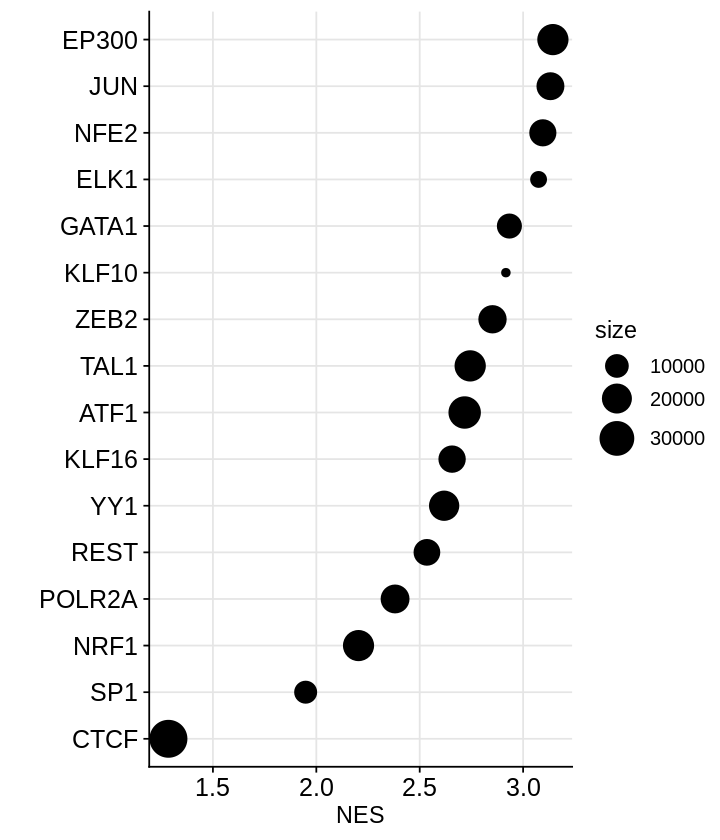

In [70]:
theme_text = theme(
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15)
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

dat = dat_astarr
gpt = ggplot(dat, aes(x = NES, y=pathway, size=size)) + 
    geom_point() + 
    scale_size(range = c(2, 10)) +
    labs(x = "NES", y = "") +
    #xlim(0, 3.5) +
    theme_cowplot() +
    theme_grid  +
    theme_text

options(repr.plot.height=7, repr.plot.width=6)
print(gpt)

In [35]:
vec_score = lst_score[["WSTARR"]]
print(length(vec_score))
head(vec_score)

[1] 246688


chr1_100006256_100006880 chr1_100010437_100010915   chr1_10002087_10003910 
             -0.48849764              -0.30895395              -0.38624192 
chr1_100021298_100021629 chr1_100023727_100023976 chr1_100027983_100029702 
             -0.59404974               0.04988694              -0.22927538

In [36]:
set.seed(123)
system.time(res_wstarr <- fgsea(
    pathways  = lst_annot, 
    stats     = vec_score
))

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-50. You can set the `eps` argument to zero for better estimation.”


    user   system  elapsed 
5555.714   13.636 1079.338 

In [47]:
dat = res_wstarr
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(NES) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))

dat_wstarr = dat
dat

pathway,pval,padj,log2err,ES,NES,size,nlogP
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CTCF,1e-50,1e-50,NA,0.2953420,1.721899,37776,50
TAL1,1e-50,1e-50,NA,0.3901922,2.272029,22428,50
GATA1,1e-50,1e-50,NA,0.4332524,2.507799,11815,50
KLF16,1e-50,1e-50,NA,0.4400400,2.553711,15342,50
NFE2,1e-50,1e-50,NA,0.4907912,2.847510,14984,50
REST,1e-50,1e-50,NA,0.5475692,3.175677,14305,50
ZEB2,1e-50,1e-50,NA,0.5480342,3.184016,16954,50
KLF10,1e-50,1e-50,NA,0.6163885,3.229104,650,50
EP300,1e-50,1e-50,NA,0.5733022,3.338538,22332,50


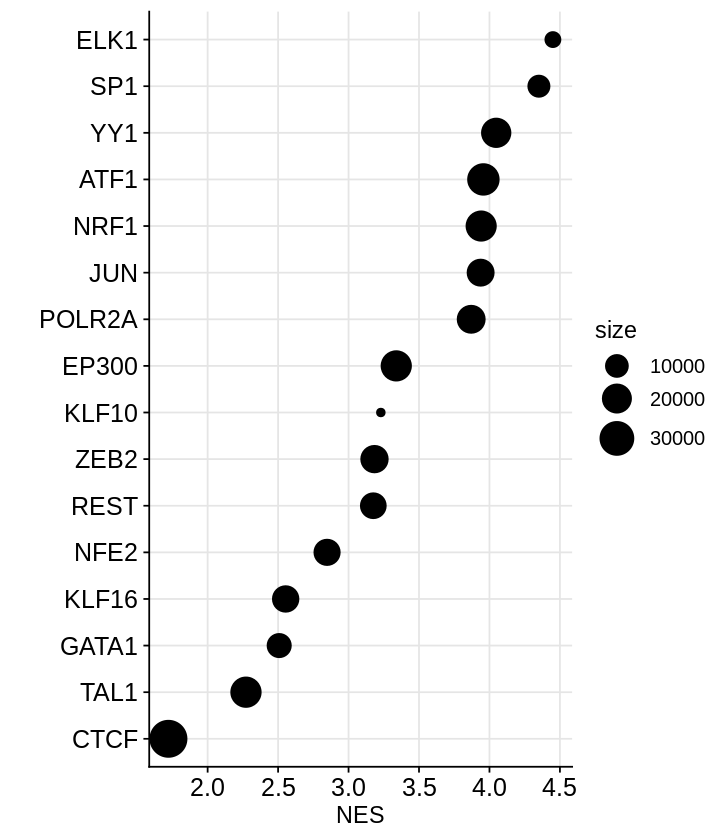

In [48]:
theme_text = theme(
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15)
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

dat = dat_wstarr
gpt = ggplot(dat, aes(x = NES, y=pathway, size=size)) + 
    geom_point() + 
    scale_size(range = c(2, 10)) +
    labs(x = "NES", y = "") +
    #xlim(0, 3.5) +
    theme_cowplot() +
    theme_grid  +
    theme_text

options(repr.plot.height=7, repr.plot.width=6)
print(gpt)

In [40]:
vec_score = lst_score[["TMPRA"]]
print(length(vec_score))
head(vec_score)

[1] 1722


chr11_61792068_61793464 chr11_61800085_61801113 chr11_61806630_61807154 
              1.6665654               1.8554038              -1.3562271 
chr11_61814735_61817343 chr11_61822094_61822443 chr11_61825795_61826306 
              2.5310145              -1.7731459              -0.3921375

In [41]:
set.seed(123)
system.time(res_tmpra <- fgsea(
    pathways  = lst_annot, 
    stats     = vec_score
))

   user  system elapsed 
 10.648   1.149   2.490 

In [45]:
dat = res_tmpra
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(NES) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))

dat_tmpra = dat
dat

pathway,pval,padj,log2err,ES,NES,size,nlogP
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
KLF10,4.218191e-03,4.218191e-03,0.4070179,0.7834405,1.641967,7,2.374874
CTCF,9.107917e-14,1.821583e-13,0.9545416,0.5522197,1.791161,271,12.739551
TAL1,4.335535e-12,5.336043e-12,0.8870750,0.5767445,1.862245,180,11.272781
NFE2,1.693867e-09,1.806792e-09,0.7881868,0.6088406,1.943453,102,8.743092
ZEB2,3.616858e-13,5.786973e-13,0.9325952,0.6171184,1.981174,139,12.237549
GATA1,3.806504e-10,4.350290e-10,0.8140358,0.6245244,1.982182,91,9.361482
KLF16,5.129219e-13,6.838959e-13,0.9214260,0.6281755,2.011459,126,12.165010
REST,4.469495e-13,6.501083e-13,0.9325952,0.6385858,2.041736,122,12.187014
EP300,5.696814e-19,1.302129e-18,1.1239150,0.6371771,2.057376,180,17.885346


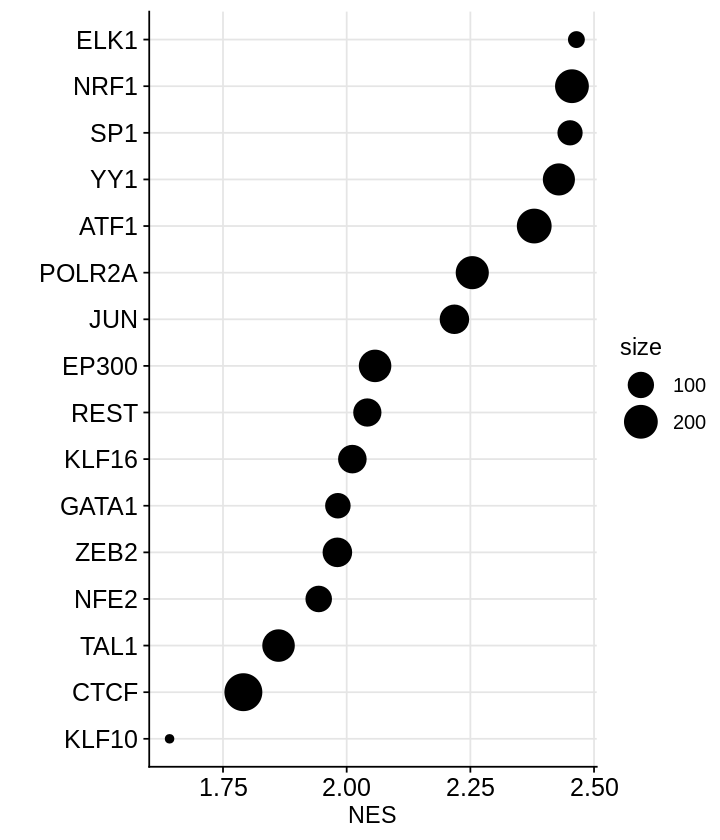

In [46]:
theme_text = theme(
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15)
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

dat = dat_tmpra
gpt = ggplot(dat, aes(x = NES, y=pathway, size=size)) + 
    geom_point() + 
    scale_size(range = c(2, 10)) +
    labs(x = "NES", y = "") +
    #xlim(0, 3.5) +
    theme_cowplot() +
    theme_grid  +
    theme_text

options(repr.plot.height=7, repr.plot.width=6)
print(gpt)

In [72]:
dat = bind_rows(
    dat_astarr %>% dplyr::mutate(Assay="ASTARR"), 
    dat_wstarr %>% dplyr::mutate(Assay="WSTARR"), 
    dat_tmpra  %>% dplyr::mutate(Assay="TMPRA")
)
head(dat)

pathway,pval,padj,log2err,ES,NES,size,nlogP,Assay
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
CTCF,1e-50,1e-50,NA,0.2662526,1.284943,37780,50,ASTARR
SP1,1e-50,1e-50,NA,0.4052435,1.948436,9048,50,ASTARR
NRF1,1e-50,1e-50,NA,0.4574510,2.204118,22194,50,ASTARR
POLR2A,1e-50,1e-50,NA,0.4943616,2.380848,17945,50,ASTARR
REST,1e-50,1e-50,NA,0.5260944,2.534823,14306,50,ASTARR
YY1,1e-50,1e-50,NA,0.5434324,2.618104,20494,50,ASTARR


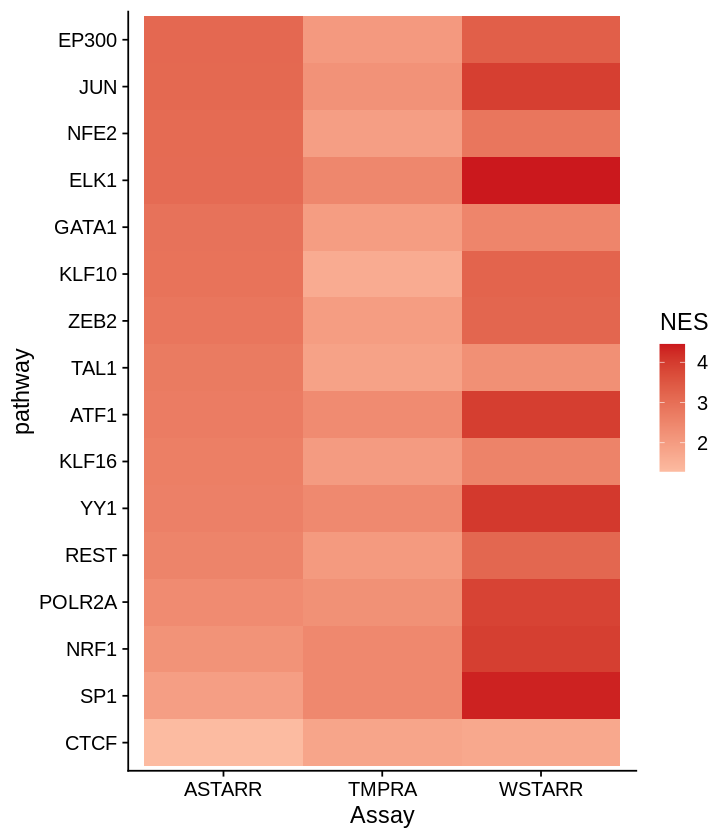

In [61]:
theme_fill = scale_fill_gradient(low = "#fcbba1", high = "#cb181d")

gpt = ggplot(dat, aes(x=Assay, y=pathway, fill=NES)) + 
    geom_tile() + 
    theme_cowplot() +
    theme_fill
print(gpt)

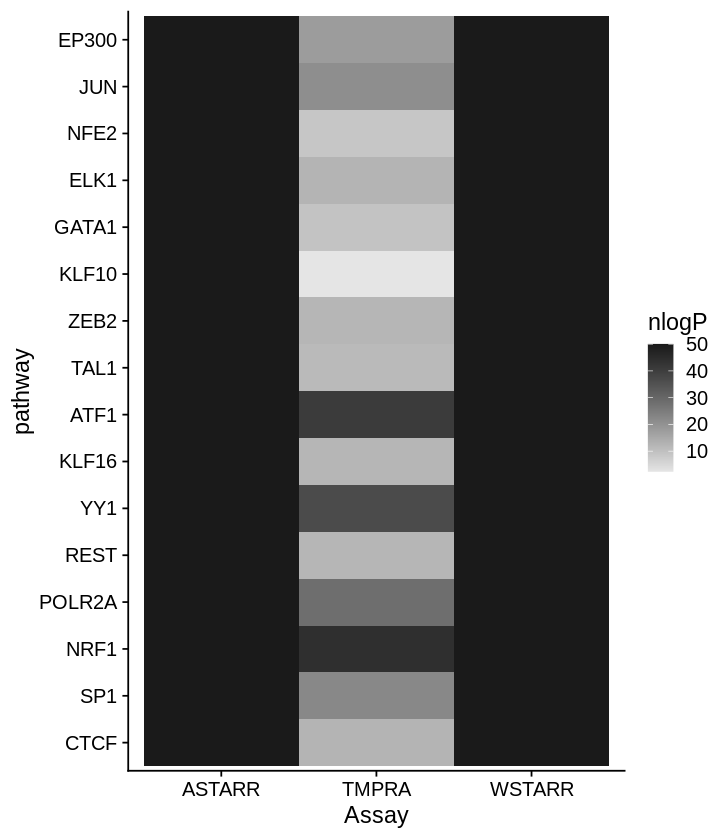

In [62]:
theme_fill = scale_fill_gradient(low = "grey90", high = "grey10")

gpt = ggplot(dat, aes(x=Assay, y=pathway, fill=nlogP)) + 
    geom_tile() + 
    theme_cowplot() +
    theme_fill
print(gpt)

In [63]:
write_tsv(dat, "tmp_enrich_split.tsv")

In [85]:
dat = read_tsv("tmp_enrich_split.tsv")

Rows: 48 Columns: 9
── Column specification ─────────────────────────────────────────
Delimiter: "\t"
chr (2): pathway, Assay
dbl (7): pval, padj, log2err, ES, NES, size, nlogP

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [86]:
tmp = dat %>% 
    group_by(Assay) %>% 
    mutate(Rank = rank(NES)/length(NES))
head(tmp)

pathway,pval,padj,log2err,ES,NES,size,nlogP,Assay,Rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CTCF,1e-50,1e-50,NA,0.2662526,1.284943,37780,50,ASTARR,0.0625
SP1,1e-50,1e-50,NA,0.4052435,1.948436,9048,50,ASTARR,0.1250
NRF1,1e-50,1e-50,NA,0.4574510,2.204118,22194,50,ASTARR,0.1875
POLR2A,1e-50,1e-50,NA,0.4943616,2.380848,17945,50,ASTARR,0.2500
REST,1e-50,1e-50,NA,0.5260944,2.534823,14306,50,ASTARR,0.3125
YY1,1e-50,1e-50,NA,0.5434324,2.618104,20494,50,ASTARR,0.3750


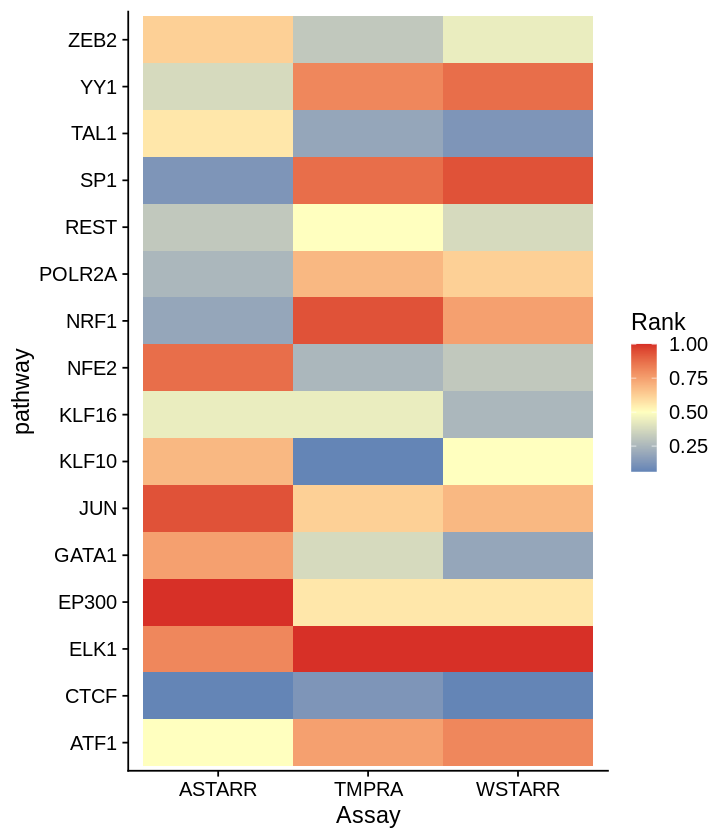

In [87]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)

dat = tmp
gpt = ggplot(dat, aes(x=Assay, y=pathway, fill=Rank)) + 
    geom_tile() + 
    theme_cowplot() +
    theme_fill
print(gpt)

In [53]:
lst = lapply(lst_score, function(vec_score){
    set.seed(123)
    res = fgsea(
        pathways  = lst_annot, 
        stats     = vec_score,
        scoreType = "pos",
        #eps       = 0.0,
        #minSize   = 15,
        #maxSize   = 500
    )
})

dat = bind_rows(lst, .id = "Assay")
dat = dat %>% 
    dplyr::select(Assay, pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj))
    
dat_fgsea = dat
print(dim(dat))
head(dat)

In [ ]:
theme_fill = scale_fill_gradient(low = "#fcbba1", high = "#cb181d")

dat = dat_fgsea
gpt = ggplot(dat, aes(x=Assay, y=pathway, fill=NES)) + 
    geom_tile() + 
    theme_cowplot() +
    theme_fill
print(gpt)

In [54]:
print(1)

[1] 1


In [51]:
dat = dat_peak_deseq_starrmpra
head(dat)

Assay,Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Dataset
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ASTARR,chr1_100006256_100006880,74.39238,-0.01311792,0.15512423,-0.08456397,9.326080e-01,0.9510236543,NA
ASTARR,chr1_100010437_100010915,48.25931,-0.80687947,0.22174651,-3.63874709,2.739677e-04,0.0008947519,NA
ASTARR,chr1_10002087_10003910,224.35927,-0.34892859,0.09743886,-3.58100041,3.422811e-04,0.0010926173,NA
ASTARR,chr1_100021298_100021629,38.13434,-1.03799571,0.25401013,-4.08643436,4.380534e-05,0.0001707736,NA
ASTARR,chr1_100023727_100023976,32.62049,-0.19100207,0.25625467,-0.74536036,4.560539e-01,0.5497617125,NA
ASTARR,chr1_100027983_100029702,290.98442,-0.18001582,0.09610434,-1.87312902,6.105057e-02,0.1032752224,NA


In [20]:
dat = dat %>%
    dplyr::select(Peak, Log2FC)
head(dat)

Peak,Log2FC
<chr>,<dbl>
chr11_4539569_4540043,0.14501695
chr11_4551336_4552012,0.32125162
chr11_4553969_4555012,0.14529397
chr11_4569016_4569992,0.01136464
chr11_4577444_4578031,0.24524353
chr11_4601808_4602487,-0.57215284


In [8]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        RankNorm = mean(RankNorm_Total),
        .groups  = "drop") %>%
    dplyr::arrange(RankNorm)

head(dat)

Peak,RankNorm
<chr>,<dbl>
chrX_48996933_48997220,0.002129307
chr8_128298518_128298762,0.009291521
chr8_128242220_128242507,0.039876113
chr11_34024311_34024546,0.040456833
chr8_128189792_128190210,0.041231127
chr20_56703281_56703575,0.048199768


In [9]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        RankNorm = mean(RankNorm_Total),
        .groups  = "drop") %>%
    dplyr::arrange(RankNorm)

vec = dat$RankNorm
names(vec) = dat$Peak

vec_peak = vec
print(length(vec))
print(head(vec))

[1] 1722
  chrX_48996933_48997220 chr8_128298518_128298762 chr8_128242220_128242507 
             0.002129307              0.009291521              0.039876113 
 chr11_34024311_34024546 chr8_128189792_128190210  chr20_56703281_56703575 
             0.040456833              0.041231127              0.048199768 


In [37]:
set.seed(42)
fgseaRes = fgsea(pathways  = lst_annot, 
                 stats     = vec_peak,
                 eps       = 0.0,
                 #minSize   = 15,
                 #maxSize   = 500,
                 scoreType = "pos"
                )

print(class(fgseaRes))

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (13.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


[1] "data.table" "data.frame"


In [38]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj))

pathway,pval,padj,log2err,ES,NES,size,nlogP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
ATF1,4.059398e-50,4.465337e-49,1.8484619,0.6442070,3.211073,217,48.350146
CTCF,6.775370e-11,7.452907e-11,0.8390889,0.3822657,1.938757,283,10.127674
ELK1,4.271464e-12,5.873263e-12,0.8870750,0.7584162,2.893149,25,11.231121
JUN,6.994925e-32,1.923604e-31,1.4675240,0.6315832,3.029299,141,30.715884
KLF10,6.506648e-03,6.506648e-03,0.4070179,0.6597818,1.902143,7,2.186643
KLF16,1.583219e-16,2.487915e-16,1.0476265,0.5259766,2.494206,128,15.604164


In [39]:
theme_color = scale_colour_gradient(low = "#fcbba1", high = "#cb181d")

theme_text = theme(
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15)
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

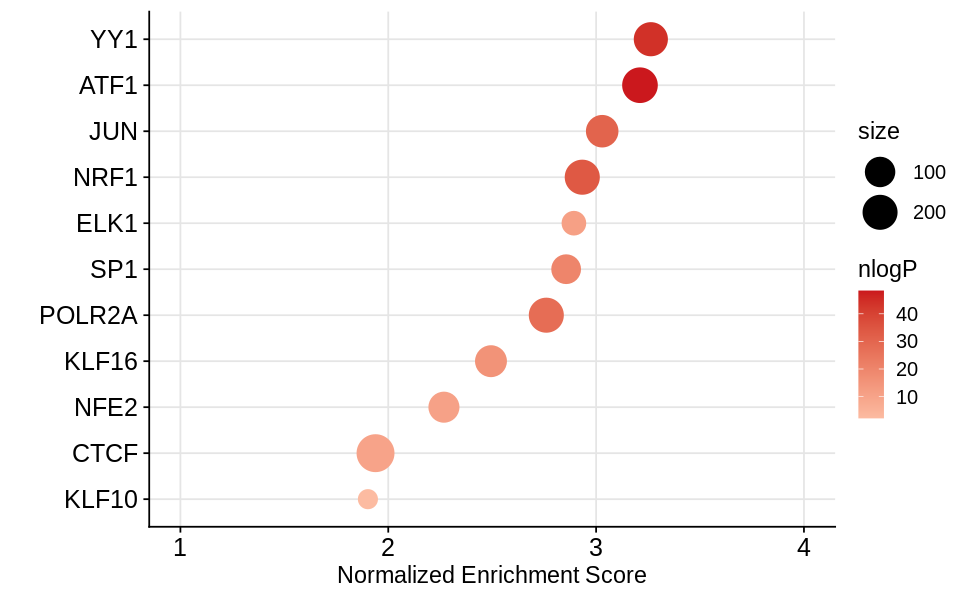

In [40]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(NES) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))

gpt = ggplot(dat, aes(x = NES, y=pathway, size=size, color=nlogP)) + 
    geom_point() + 
    scale_size(range = c(5, 10)) +
    xlim(1, 4.0) +
    labs(x = "Normalized Enrichment Score", y = "") +
    theme_cowplot() +
    theme_grid +
    theme_text +
    theme_color

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

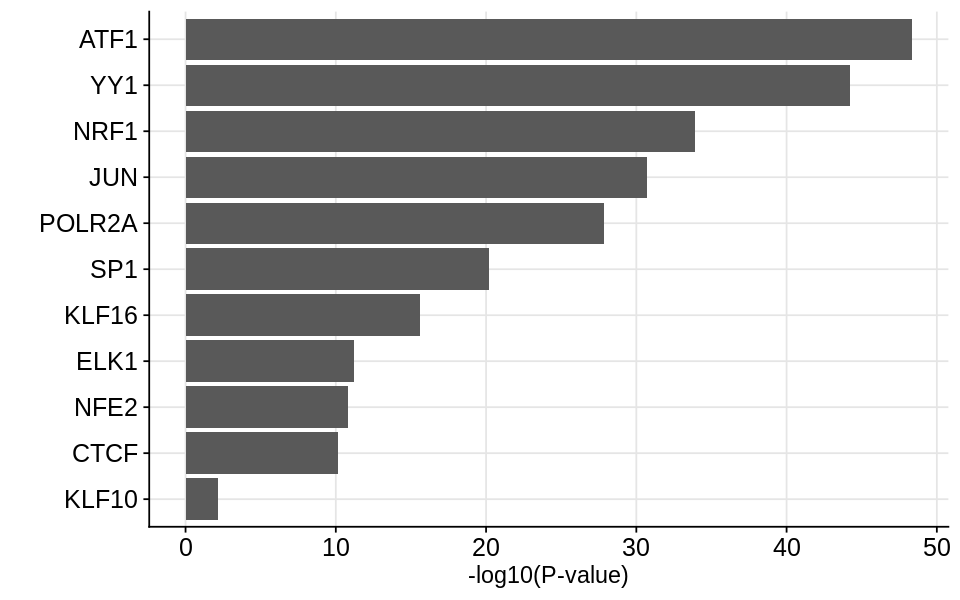

In [47]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(nlogP) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))

gpt = ggplot(dat, aes(x = nlogP, y = pathway)) + 
    geom_col() +
    labs(x = "-log10(P-value)", y = "") +
    theme_cowplot() +
    theme_grid +
    theme_text

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [48]:
dat$pathway

[1] KLF10  CTCF   NFE2   ELK1   KLF16  SP1    POLR2A JUN    NRF1   YY1   
[11] ATF1  
Levels: KLF10 CTCF NFE2 ELK1 KLF16 SP1 POLR2A JUN NRF1 YY1 ATF1